In [12]:
import sys
sys.path.insert(0, '../scripts/')


from ruler.measures.cwl_rbp import RBPCWLMetric
from ruler.measures.cwl_inst import INSTCWLMetric
from ruler.measures.cwl_bpm import BPMDCWLMetric

class Ranking(object):
    def __init__(self, topic_id, gains, costs):
        self.topic_id = topic_id
        self.gains = gains
        self.costs = costs
        self.total_gain = 0.0
        self.total_rels = 0.0
        for g in gains:
            self.total_gain += g
            if g > 0.0:
                self.total_rels += 1.0
        


In [13]:
g1 = [ 1,0,1,1,0,0,1,0,1,0]
c1 = [ 1,1,1,1,1,1,1,1,1,1]

t1 = Ranking("T1",g1,c1)


In [14]:
rbp = RBPCWLMetric(theta=0.9)
rbp.measure(t1)
rbp.report()

T1	RBP@0.9	0.3501	3.5009	1.0000	10.0000	10.0000


In [15]:
print(rbp.c_vector(t1)[0:10])

[ 0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9]


In [16]:
print(rbp.w_vector(t1)[0:10])

[ 0.1         0.09        0.081       0.0729      0.06561     0.059049
  0.0531441   0.04782969  0.04304672  0.03874205]


In [17]:
inst = INSTCWLMetric(T=1)
inst.measure(t1)
inst.report()

T1	INST-T=1	0.7934	1.1719	1.0000	1.4770	1.4771


In [18]:
print(inst.c_vector(t1)[0:10])

[ 0.25        0.44444444  0.44444444  0.44444444  0.5625      0.64        0.64
  0.69444444  0.69444444  0.73469388]


In [19]:
print(inst.w_vector(t1)[0:10])

[ 0.67700797  0.16925199  0.07522311  0.03343249  0.01485889  0.00835812
  0.0053492   0.00342349  0.00237742  0.00165099]


In [20]:
bpm = BPMDCWLMetric(T=3)
bpm.measure(t1)
bpm.report()

T1	BPM-Dynamic-T=3-K=10-hb=1.0-hc=1.0	0.5714	4.0000	1.0000	7.0000	7.0000


Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: MacOSX


/Users/leif/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


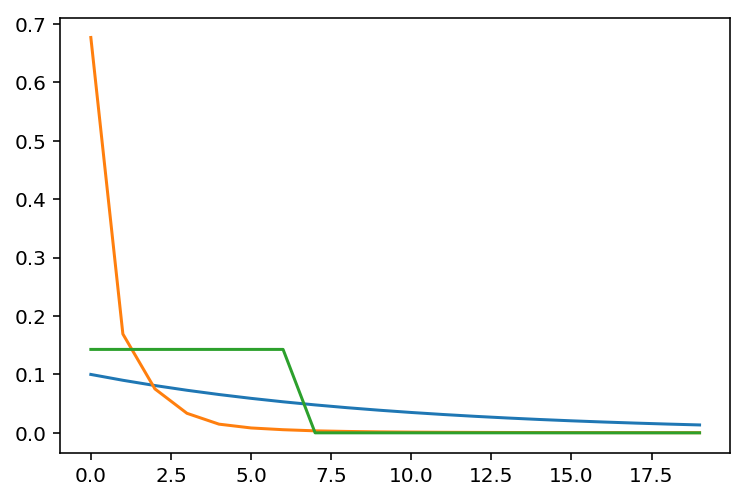

In [22]:
import pylab
%pylab inline
%matplotlib

pylab.plot(rbp.w_vector(t1)[0:20])
pylab.plot(inst.w_vector(t1)[0:20])
pylab.plot(bpm.w_vector(t1)[0:20])




In [31]:
g1 = [ 1,1,0,0,0,0,1,0,1,0]
c1 = [ 1,1,1,1,1,1,1,1,1,1]

t2 = Ranking("T2",g1,c1)

bpm38 = BPMDCWLMetric(T=3, K=8,hc=1.0, hb=1.0)
bpm33 = BPMDCWLMetric(T=5,K=4,hc=1.0, hb=1.0)



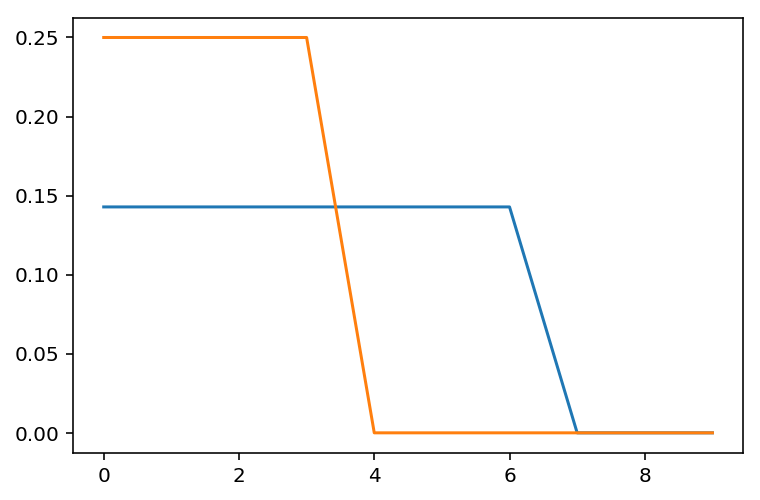

In [32]:
pylab.figure()
pylab.plot(bpm38.w_vector(t2)[0:20])
pylab.plot(bpm33.w_vector(t2)[0:20])
